# Setup Data Set

Import yfinance package to call yahoo finance API to fetch daily stock index prices, see documentation for more https://pypi.org/project/yfinance/ .

In [2]:
import yfinance as yf

Fetches price history for a symbol, for our case SNP500 index is used.

In [3]:
snp500 = yf.Ticker("^GSPC")

Query historical prices for maximum time period, ie. all time data.

In [4]:
snp500 = snp500.history(period="max")
snp500


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-25 00:00:00-04:00,5775.959961,5786.950195,5760.419922,5776.649902,4467340000,0.0,0.0
2025-03-26 00:00:00-04:00,5771.660156,5783.620117,5694.410156,5712.200195,4183140000,0.0,0.0
2025-03-27 00:00:00-04:00,5695.640137,5732.279785,5670.939941,5693.310059,4403460000,0.0,0.0


Clean data by removing unnecessary columns.

In [5]:
del snp500['Dividends']
del snp500['Stock Splits']

Plot closing prices for refrence.

<Axes: xlabel='Date'>

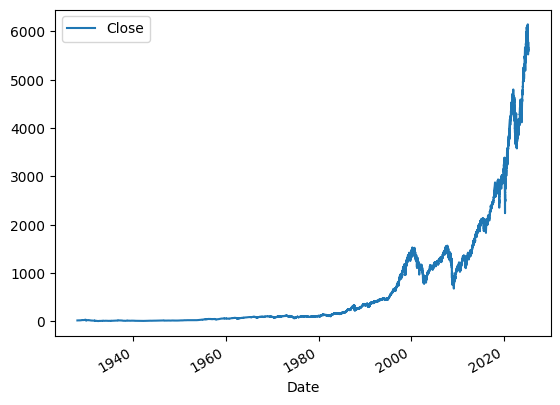

In [6]:
snp500.index
snp500.plot.line(y="Close", use_index=True)

# Setup Target For ML Model

First add a column for the closing price for next day.

In [7]:
snp500["Tommorow"] = snp500["Close"].shift(-1)

Next, add in the the target column, comparing if the price increased or decreased from the previous day. Keep in mind that true will be represented as 1 and false as 0.

In [8]:
snp500["Target"] = (snp500["Tommorow"] > snp500["Close"]).astype(int)

To keep data accurate we will restrict the data to start at 1990.

In [9]:
snp500 = snp500.loc["1990-01-01":].copy()

Below is an updated table for refrence.

In [10]:
snp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-03-25 00:00:00-04:00,5775.959961,5786.950195,5760.419922,5776.649902,4467340000,5712.200195,0
2025-03-26 00:00:00-04:00,5771.660156,5783.620117,5694.410156,5712.200195,4183140000,5693.310059,0
2025-03-27 00:00:00-04:00,5695.640137,5732.279785,5670.939941,5693.310059,4403460000,5580.939941,0


# Training Initial ML Model

In [11]:
from sklearn.ensemble import RandomForestClassifier